<a href="https://colab.research.google.com/github/RupeshSharma14/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [227]:
# Importing data analysis and visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from google.colab import drive

%matplotlib inline

In [228]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

# **Reading the data**

In [229]:
# Mounting the google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
# Loading the dataset

path = "/content/drive/MyDrive/Online Retail Customer Segmentation/Online Retail.xlsx"
retail_df = pd.read_excel(path)

In [231]:
# Displaying the first five rows of the dataset

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [232]:
# Displaying the last five rows of the dataset

retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [233]:
# Size of the dataset

retail_df.shape

(541909, 8)

The dataset consists of 541909 rows and 8 columns.

In [234]:
# Checking for duplicate rows in the dataset

retail_df.duplicated().sum()

5268

There are 5268 duplicate rows in the dataset.

In [235]:
# Dropping the duplicate rows of the dataset

retail_df.drop_duplicates(inplace = True)

In [236]:
# Checking for any Null values

retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

CustomerID and Description features contain Null values.

In [237]:
# Dropping Null values present in the dataset

retail_df.dropna(inplace = True)

In [238]:
# Size of the dataset after removing Null values

retail_df.shape

(401604, 8)

In [239]:
# Checking the data type of variables

retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [240]:
# Extracting new features from InvoiceDate column

retail_df["Year"] = retail_df["InvoiceDate"].dt.year
retail_df["Month"] = retail_df["InvoiceDate"].dt.month_name()
retail_df["Weekday"] = retail_df["InvoiceDate"].dt.day_name()
retail_df["Hour"] = retail_df["InvoiceDate"].dt.hour

In [241]:
# Descriptive Summary

retail_df.describe()

,Quantity,UnitPrice,CustomerID,Year,Hour
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,2010.934378,12.731031
std,250.283037,69.764035,1714.006089,0.247620,2.288211
min,-80995.000000,0.000000,12346.000000,2010.000000,6.000000
25%,2.000000,1.250000,13939.000000,2011.000000,11.000000
50%,5.000000,1.950000,15145.000000,2011.000000,13.000000
75%,12.000000,3.750000,16784.000000,2011.000000,14.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,20.000000


In [226]:
# Removing rows where Quantity is negative or Unit price is 0

retail_df = retail_df[(retail_df["Quantity"] > 0) | (retail_df["UnitPrice"] != 0)]

# **Exploratory Data Analysis**

**Number of unique customers**

In [210]:
print(f"Number of unique customers: {retail_df.CustomerID.nunique()}")

Number of unique customers: 4339


**Number of unique products sold**

In [211]:
print(f"Number of unique products sold: {retail_df.StockCode.nunique()}")

Number of unique products sold: 3665


**Number of unique countries**

In [212]:
print(f"Number of unique countries: {retail_df.Country.nunique()}")

Number of unique countries: 37


**Top 5 countries with most number of orders**

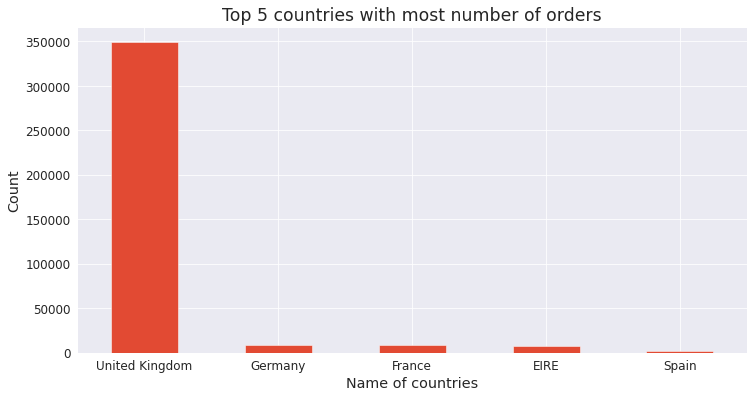

In [213]:
retail_df["Country"].value_counts().head().plot(kind = "bar")
plt.title("Top 5 countries with most number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

The above visualisation shows that the majority of orders come from the United Kingdom, followed by Germany and France, indicating that Online Retail Marketing is very common in Europe.

**Top 5 countries with least number of orders**

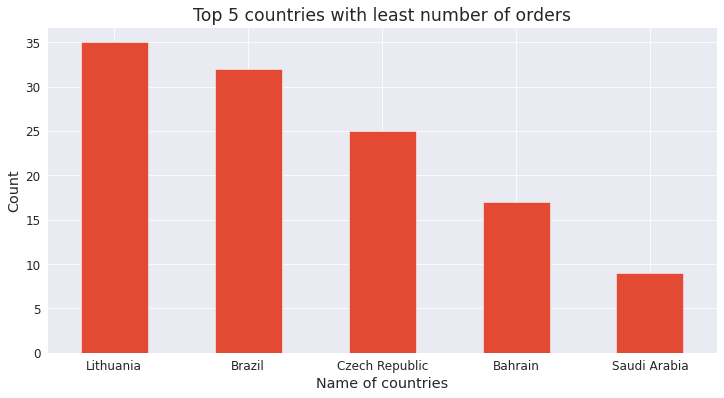

In [214]:
retail_df["Country"].value_counts().tail().plot(kind = "bar")
plt.title("Top 5 countries with least number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

According to the above visualisation, Online Retail Marketing has very few customers from the Middle East.

**Total number of customers per country**

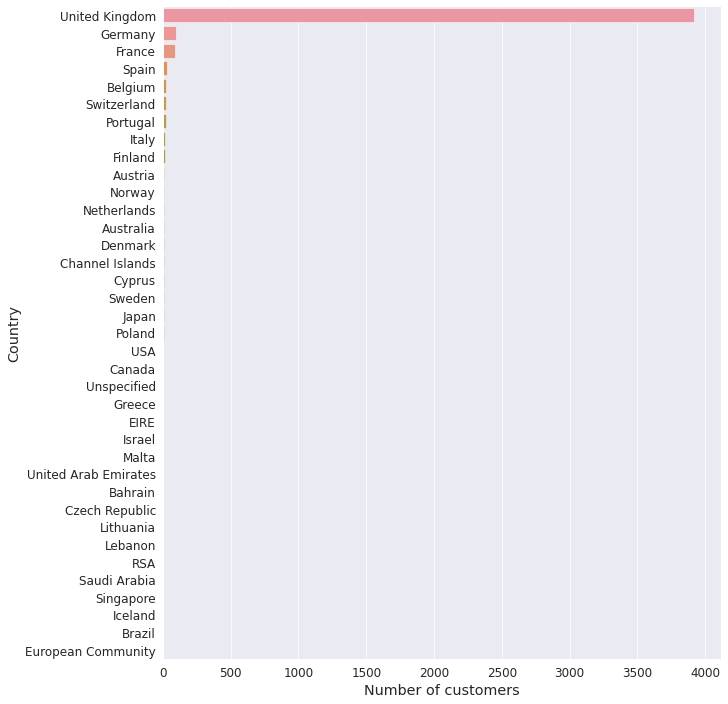

In [215]:
plt.figure(figsize = (10, 12))
customer_per_country = retail_df.groupby("Country")["CustomerID"].nunique().sort_values(axis = 0, ascending = False)
sns.barplot(x = customer_per_country.values, y = customer_per_country.index)
plt.xlabel("Number of customers")
plt.show()

It seems that United Kingdom has the most number of customers, in the dataset.

**Total sales revenue per country**

In [216]:
retail_df["TotalCost"] = retail_df["Quantity"] * retail_df["UnitPrice"]

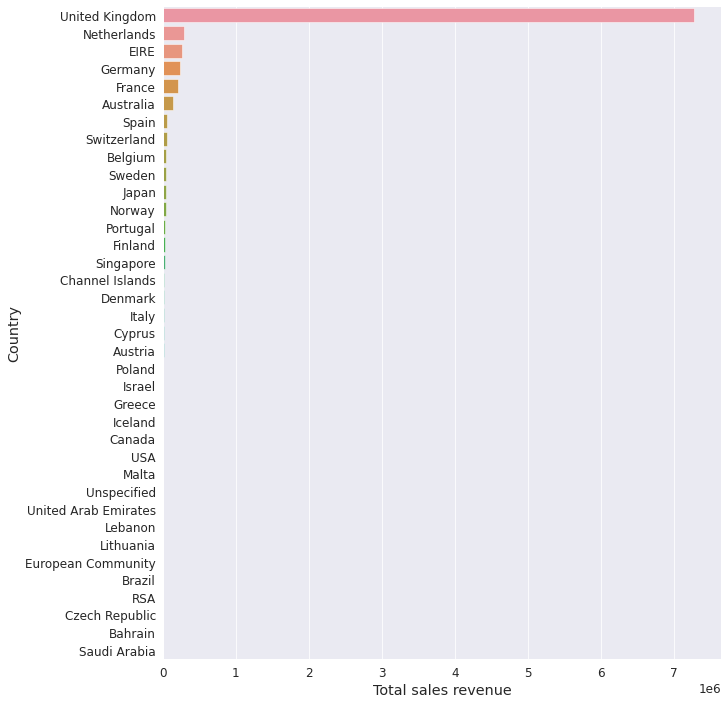

In [217]:
plt.figure(figsize = (10, 12))
customer_per_country = retail_df.groupby("Country")["TotalCost"].sum().sort_values(axis = 0, ascending = False)
sns.barplot(x = customer_per_country.values, y = customer_per_country.index)
plt.xlabel("Total sales revenue")
plt.show()

The United Kingdom has the most customers as well as the most sales revenue.  As a result, I will only use data from orders placed in the United Kingdom for the purpose of this project, as customer clusters vary by geography, according to research.

## **Exploring the UK market**

In [218]:
retail_uk_df = retail_df.loc[retail_df["Country"] == "United Kingdom"].copy()
retail_uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Weekday,Hour,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [219]:
retail_uk_df.drop(columns = "Country", inplace = True)

**Number of unique customers in UK**

In [220]:
print(f"Number of unique customers in UK: {retail_uk_df.CustomerID.nunique()}")

Number of unique customers in UK: 3921


**Number of unique products in UK**

In [221]:
print(f"Number of unique products sold in UK: {retail_uk_df.StockCode.nunique()}")

Number of unique products sold in UK: 3645


**Proportion of one time and repeated customers**

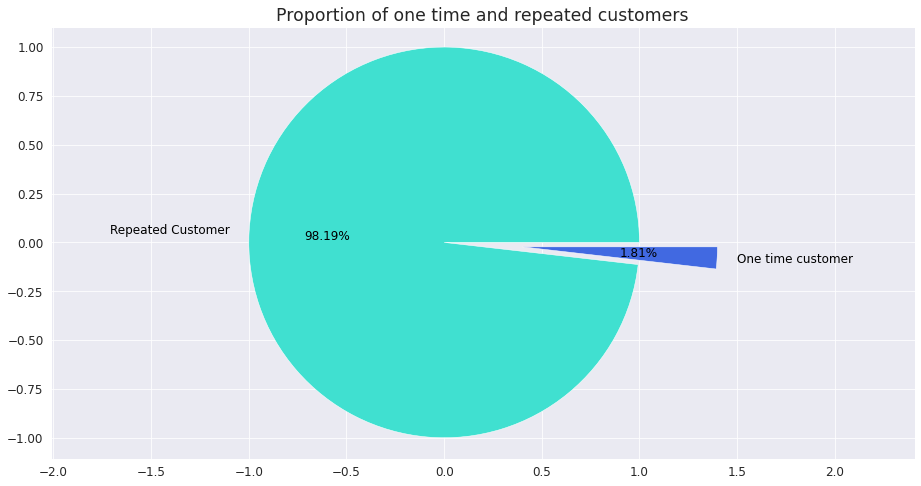

In [222]:
# Proportion of one time and repeated customers

customer_proportion = retail_uk_df["CustomerID"].value_counts().to_frame()
customer_proportion["repeated_customer"] = np.where(customer_proportion["CustomerID"] > 1, 1, 0)
customer_proportion["repeated_customer"].value_counts()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.pie(customer_proportion["repeated_customer"].value_counts(), labels = ["Repeated Customer", "One time customer"],
        explode = (0, 0.4), autopct = "%1.2f%%", colors = ["turquoise", "royalblue"], frame = True, textprops = dict(color = "black", size = 12))

ax.axis("equal")
plt.title("Proportion of one time and repeated customers")

plt.show()

The retail store in the United Kingdom has 98 percent repeat customers. The majority of customers appear to be satisfied with the retail store.

**Top 10 most sold products**

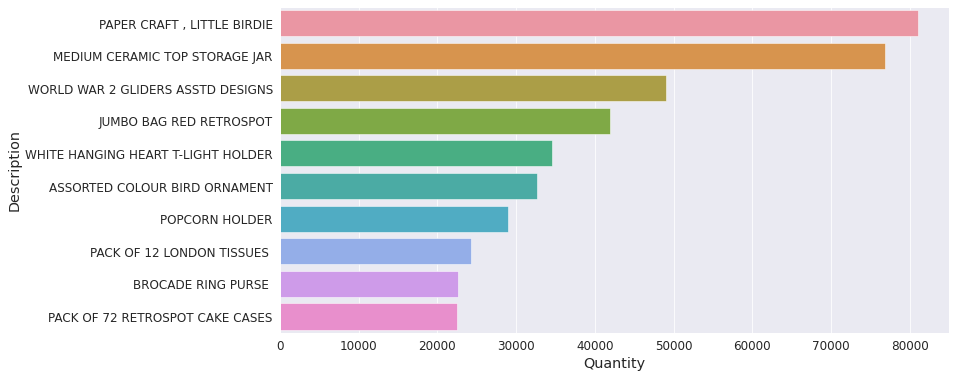

In [223]:
# 

popular_product = retail_uk_df.groupby(["StockCode", "Description"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False)
sns.barplot(x = "Quantity", y = "Description", data = popular_product.head(10))

plt.show()

**Top 10 least sold products**

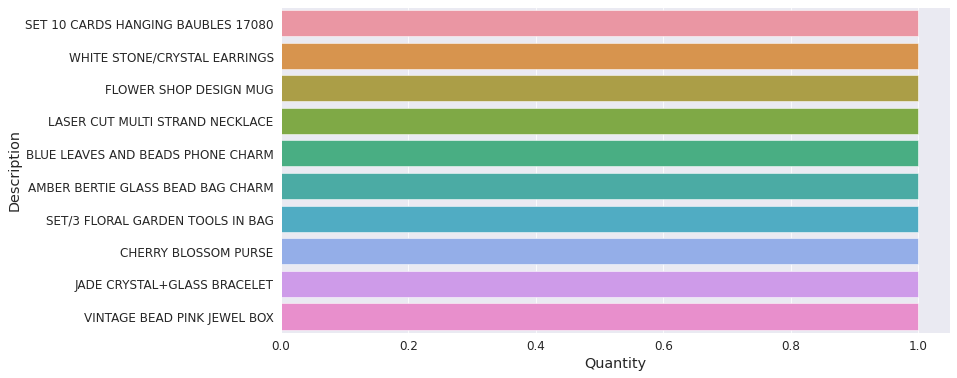

In [224]:
# 

sns.barplot(x = "Quantity", y = "Description", data = popular_product.tail(10))

plt.show()

**Sales on Weekdays**

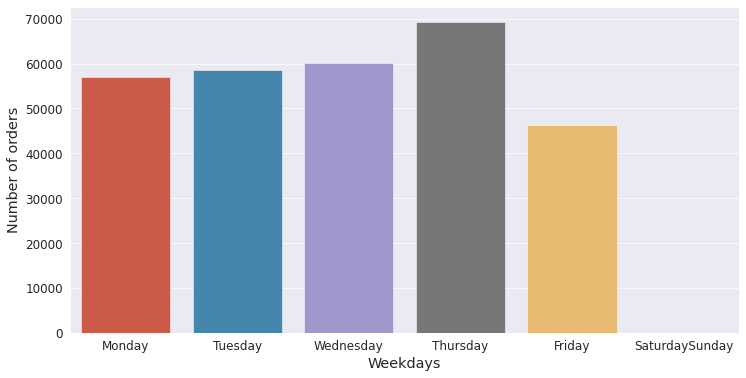

In [276]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday" "Sunday"]

weekdays_sale = retail_uk_df["Weekday"].value_counts()
sns.barplot(x = weekdays_sale.index, y = weekdays_sale.values, order = days_order)
plt.xlabel("Weekdays")
# plt.ylabel("Number of orders")

plt.show()

69213    1
60113    1
58568    1
58097    1
57044    1
46192    1
Name: Weekday, dtype: int64

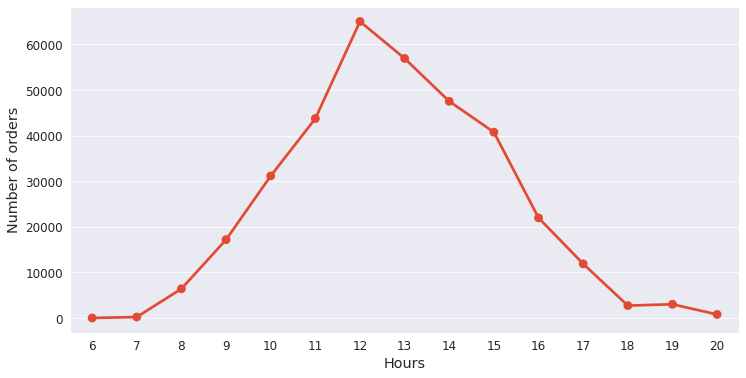

In [277]:


weekdays_sale = retail_uk_df["Hour"].value_counts()
sns.pointplot(x = weekdays_sale.index, y = weekdays_sale.values)
plt.xlabel("Hours")
# plt.ylabel("Number of orders")
plt.show()

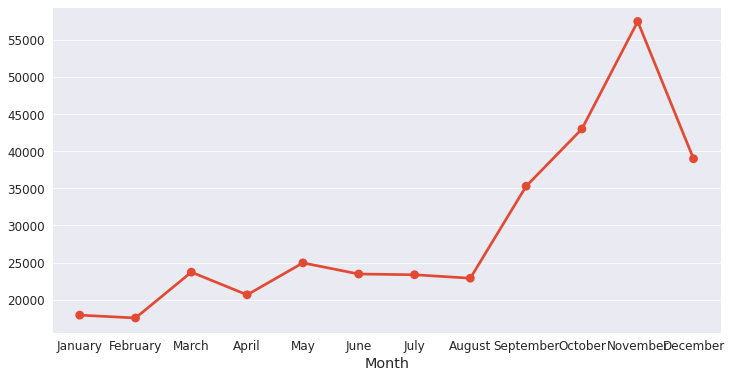

In [279]:

months_order = ["January", "February", "March", "April", "May", "June", "July", 
                "August", "September", "October", "November", "December"]

weekdays_sale = retail_uk_df["Month"].value_counts()
sns.pointplot(x = weekdays_sale.index, y = weekdays_sale.values, order = months_order)
plt.xlabel("Month")
# plt.ylabel("Number of orders")
plt.show()